# Predictive Maintainance to avoid Motor Failure

### Import libraries &  dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve,auc

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AshuPraja13/Data-Science/main/motor_failure.csv')
df.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
217,218,L47397,L,298.3,308.5,1664,31.6,144,0,No Failure
6522,6523,L53702,L,301.1,310.1,1489,45.8,42,0,No Failure
8634,8635,L55814,L,297.3,308.3,1411,43.2,63,0,No Failure
5564,5565,L52744,L,302.4,311.8,1416,46.1,202,0,No Failure
2440,2441,L49620,L,299.1,308.4,1426,47.9,67,0,No Failure


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [6]:
df = df.iloc[:,2:]
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [7]:
df['Failure Type'][df['Target']==0].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [8]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [9]:
df.columns[1:]

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

### Visualization

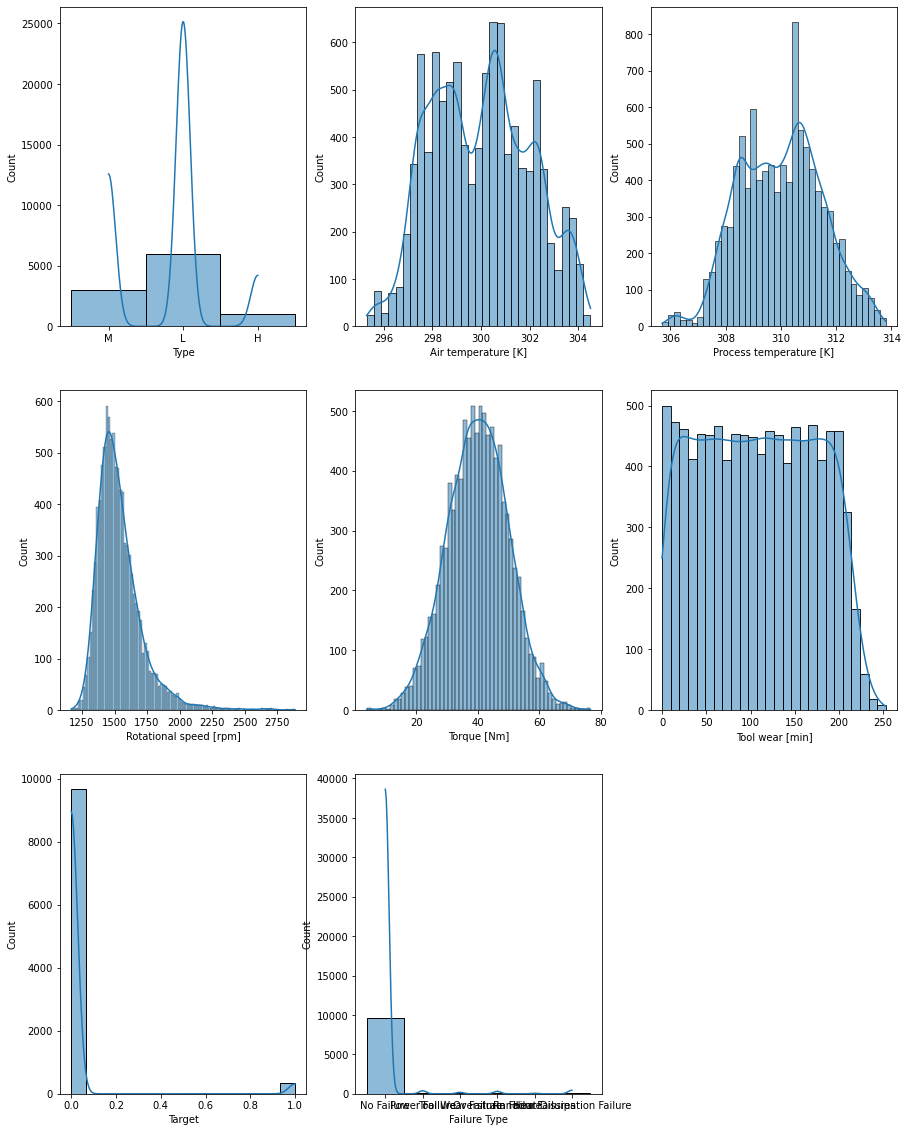

In [10]:
plt.figure(figsize=(15,20))
for index,i in enumerate(df.columns):
    plt.subplot(3,3,index+1)
    sns.histplot(df[i],kde=True)

### Feature Engineering

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
ss = StandardScaler()

In [12]:
df['Type'] = le.fit_transform(df['Type'])
df['Failure Type'] = le.fit_transform(df['Failure Type'])

In [13]:
df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']] = ss.fit_transform(df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2],df.iloc[:,-2:],train_size=0.8,random_state=0,
                                                 stratify=df.iloc[:,-1:])

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_train.shape

((8000, 6), (2000, 6), (8000, 2), (8000, 2))

### Machine Learning

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [18]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
# roc_auc_score(y_test,y_pred)

In [19]:
# accuracy_score(y_test,y_pred)

In [20]:
(y_test == y_pred).mean()

Target          0.9885
Failure Type    0.9835
dtype: float64

In [21]:
print(classification_report(np.array(y_test)[:,0],y_pred[:,0]))
print(classification_report(np.array(y_test)[:,1],y_pred[:,1]))
# print(classification_report(np.array(y_test),y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.91      0.74      0.81        68

    accuracy                           0.99      2000
   macro avg       0.95      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.99      1.00      0.99      1930
           2       0.64      0.44      0.52        16
           3       0.81      0.89      0.85        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.98      2000
   macro avg       0.56      0.53      0.54      2000
weighted avg       0.98      0.98      0.98      2000



C:\Users\akpra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akpra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akpra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


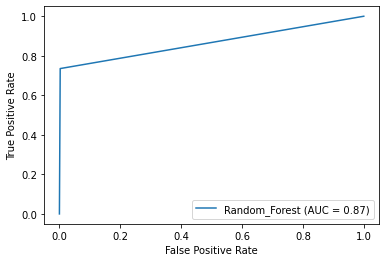

In [22]:
fpr, tpr, thresholds = roc_curve(np.array(y_test)[:,0],y_pred[:,0])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc(fpr, tpr),estimator_name='Random_Forest').plot()

### Upsampling using SMOTE

In [23]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=0)

In [24]:
X_train_resample,y_train_resample = smoteenn.fit_resample(X_train,y_train.iloc[:,1])

In [25]:
# X_train_resample,y_train_resample = smoteenn.fit_resample(X_train,y_train)

In [26]:
y_train_resample.value_counts()

0    7722
2    7722
3    7721
4    7721
5    7721
1    7001
Name: Failure Type, dtype: int64

In [27]:
rfc.fit(X_train_resample,y_train_resample)
y_pred = rfc.predict(X_test)

In [28]:
print(classification_report(np.array(y_test)[:,1],y_pred))
# print(classification_report(np.array(y_test),y_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        22
           1       0.99      0.95      0.97      1930
           2       0.48      0.88      0.62        16
           3       0.55      0.95      0.69        19
           4       0.00      0.00      0.00         4
           5       0.10      0.33      0.16         9

    accuracy                           0.94      2000
   macro avg       0.46      0.68      0.53      2000
weighted avg       0.98      0.94      0.96      2000



In [29]:
confusion_matrix(np.array(y_test)[:,1],y_pred)
# confusion_matrix(np.array(y_test),y_pred)

array([[  21,    1,    0,    0,    0,    0],
       [  13, 1824,   13,   13,   41,   26],
       [   0,    0,   14,    2,    0,    0],
       [   0,    1,    0,   18,    0,    0],
       [   0,    4,    0,    0,    0,    0],
       [   0,    4,    2,    0,    0,    3]], dtype=int64)

### Hyperparameter Tunning

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
def rs(X_train,y_train,X_test,y_test,estimator,param_grids):
    rs = RandomizedSearchCV(estimator,param_distributions=param_grids,n_iter=5)
    rs.fit(X_train,y_train)
    print("Best Parameter:\n",rs.best_params_)
    print("Best Parameter:\n",rs.cv_results_['params'])
    print("Best Score:\n",rs.best_score_)

In [32]:
param_grids = {'criterion' : ("gini","entropy"),
              'max_depth': [20,30,40,50,60]}

In [33]:
rs(X_train_resample,y_train_resample,X_test,y_test,rfc,param_grids)

Best Parameter:
 {'max_depth': 60, 'criterion': 'gini'}
Best Parameter:
 [{'max_depth': 30, 'criterion': 'gini'}, {'max_depth': 40, 'criterion': 'entropy'}, {'max_depth': 30, 'criterion': 'entropy'}, {'max_depth': 20, 'criterion': 'entropy'}, {'max_depth': 60, 'criterion': 'gini'}]
Best Score:
 0.9970838285852649


In [38]:
rfc = RandomForestClassifier(criterion='gini', max_depth=60)

In [39]:
rfc.fit(X_train_resample,y_train_resample)
y_pred = rfc.predict(X_test)

In [40]:
print(classification_report(np.array(y_test)[:,1],y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        22
           1       1.00      0.94      0.97      1930
           2       0.45      0.88      0.60        16
           3       0.53      0.95      0.68        19
           4       0.02      0.25      0.04         4
           5       0.16      0.56      0.24         9

    accuracy                           0.94      2000
   macro avg       0.46      0.76      0.55      2000
weighted avg       0.98      0.94      0.96      2000



In [41]:
confusion_matrix(np.array(y_test)[:,1],y_pred)

array([[  22,    0,    0,    0,    0,    0],
       [  13, 1819,   15,   14,   42,   27],
       [   0,    0,   14,    2,    0,    0],
       [   0,    1,    0,   18,    0,    0],
       [   0,    3,    0,    0,    1,    0],
       [   0,    2,    2,    0,    0,    5]], dtype=int64)